<a href="https://www.kaggle.com/code/pranayrishith16/world-happiness-eda?scriptVersionId=134722602" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

World happiness dataset has 5 years ranking of countries separately. The main object of this notebook is to work on my EDA skills. There is not a lot of data present, but this dataset might work best if you want to work on your EDA mainly, visualization skills.

First thing is to question what do i want from this dataset?
As this is world happiness dataset, i want to know what factors the happiness ranking. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/world-happiness/2015.csv
/kaggle/input/world-happiness/2017.csv
/kaggle/input/world-happiness/2019.csv
/kaggle/input/world-happiness/2018.csv
/kaggle/input/world-happiness/2016.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


reading data from csv into pandas dataframe, as the files are differentiated based on years, i will be reading them seperately and in future i will be merging them based on requirements.

In [3]:
data15 = pd.read_csv('/kaggle/input/world-happiness/2015.csv')
data16 = pd.read_csv('/kaggle/input/world-happiness/2016.csv')
data17 = pd.read_csv('/kaggle/input/world-happiness/2017.csv')
data18 = pd.read_csv('/kaggle/input/world-happiness/2018.csv')
data19 = pd.read_csv('/kaggle/input/world-happiness/2019.csv')

# 2015

In [4]:
data15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


Lets see what are the features

In [5]:
data15.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [6]:
data15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
data15.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [8]:
data15.describe(include='object')

,Country,Region
count,158,158
unique,158,10
top,Switzerland,Sub-Saharan Africa
freq,1,40


By above info and describe, there are 2 categorical features and 10 continuous features. non of them have any missing values. But if we focus a little into the continuous values, **Happiness ranking is not actually a continuous values where the values range from 1 to 158** where 1 is best and 158 is worst. we need to find a way to work with this data in future.

Now coming back to the answer, i will be using my instincts or theory that what might affect the happiness ranking. I think happiness rank might be correleated to Economy, Health, freedom and trust. I also think there might be correleation between the features like Economy-Health, Economy-Family,Economy-Trust,Health-Family,Health-Freedom

These are the initial theory i have, once the theory has been explained i will be using correleation map to see if my theory is right and to see if any other correleations.

## Understanding Data

### Now Lets use Visualization


**Continuous features**:
* Happiness Score
* Standard Error
* Economy (GDP per Capita)
* Family
* Health (Life Expectancy)
* Freedom
* Trust (Government Corruption)
* Generosity
* Dystopia Residual

**Categorical Features**:
* Country
* Region

**Special Feature**:
* Happiness Rank

## Univariate Analysis

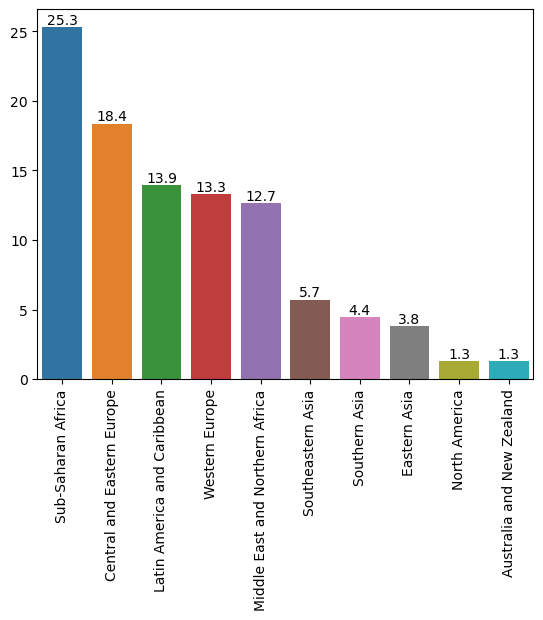

In [9]:
value = data15['Region'].value_counts(normalize=True)*100
sns_plot = sns.barplot(x=value.index,y=value.values)
plt.xticks(rotation=90)

for i,v in enumerate(value.values):
    sns_plot.text(i, v, f"{v:.1f}", ha='center', va='bottom')

plt.show()

We can see that Sub-saharan africa contributes 25% towards world happiness ranking.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Count'>

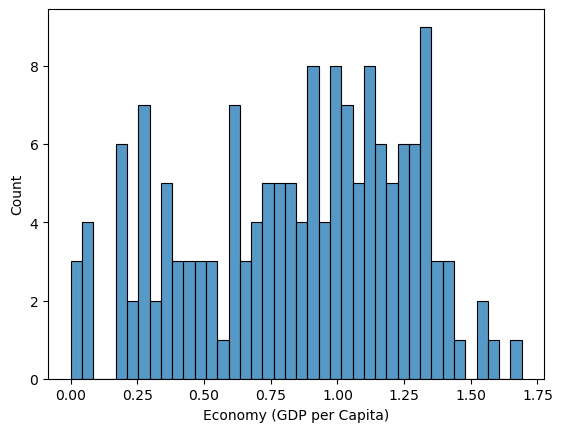

In [10]:
sns.histplot(data=data15,x='Economy (GDP per Capita)',bins=40)

<AxesSubplot:xlabel='Health (Life Expectancy)', ylabel='Count'>

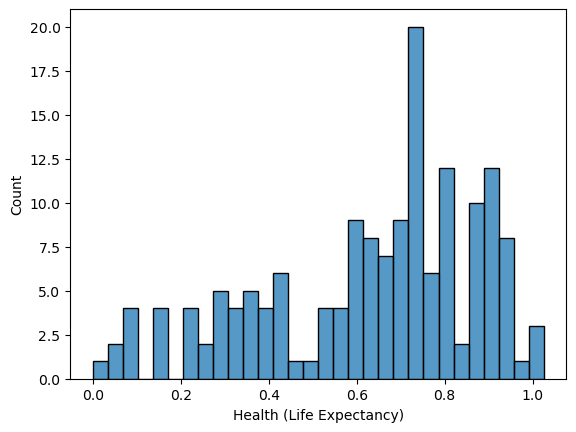

In [11]:
sns.histplot(data=data15,x='Health (Life Expectancy)',bins=30)

## Bivariate Analysis

<AxesSubplot:xlabel='Happiness Rank', ylabel='Economy (GDP per Capita)'>

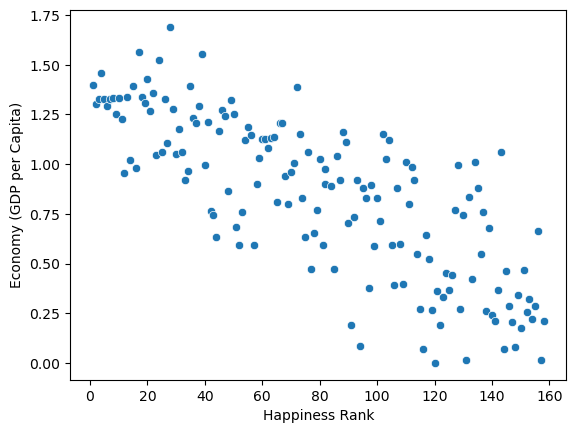

In [12]:
sns.scatterplot(data=data15,x='Happiness Rank',y='Economy (GDP per Capita)')

As my assumption, Rank and Economy are correlated. As the rank goes higher the economy starting to scatter outwards, but there is not a lot of scattering.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Health (Life Expectancy)'>

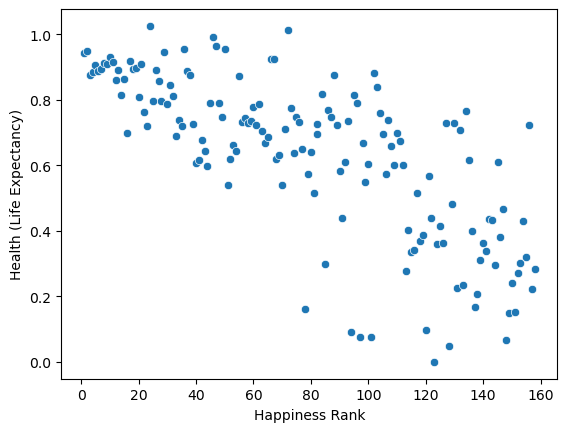

In [13]:
sns.scatterplot(data=data15,x='Happiness Rank',y='Health (Life Expectancy)')

Lower the Rank, higher the life expectency. as the rank progresses, the life expectency takes a toll by being unstable. for example at higher rank like 100, health is at 0.85 and also at 0.12. So these features are not highly correlated but somewhat correlated.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Freedom'>

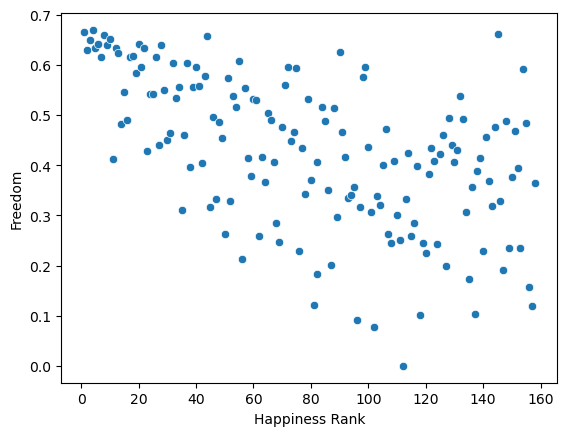

In [14]:
sns.scatterplot(data=data15,x='Happiness Rank',y='Freedom')

Same as above, Lower the rank, more the freedom but as we progress towards higher rank the freedom scatters a lot and to the end it spreads like water.

<AxesSubplot:xlabel='Happiness Rank', ylabel='Trust (Government Corruption)'>

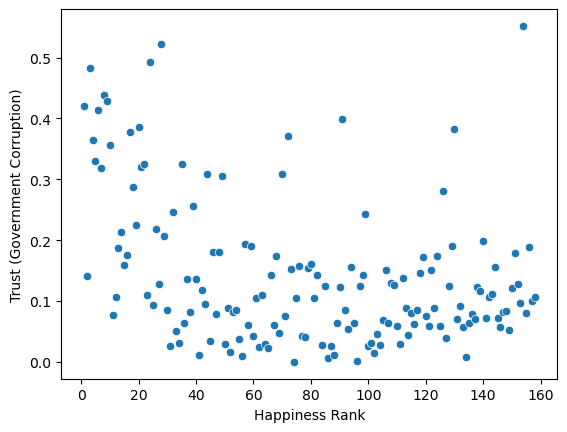

In [15]:
sns.scatterplot(data=data15,x='Happiness Rank',y='Trust (Government Corruption)')

To be frank,My assumption is gone wrong in terms of Rank and Trust. as you see Beyond rank 20 there is no correlation means the trust is almost constant towards higher. The lower rank sees a little more trust.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

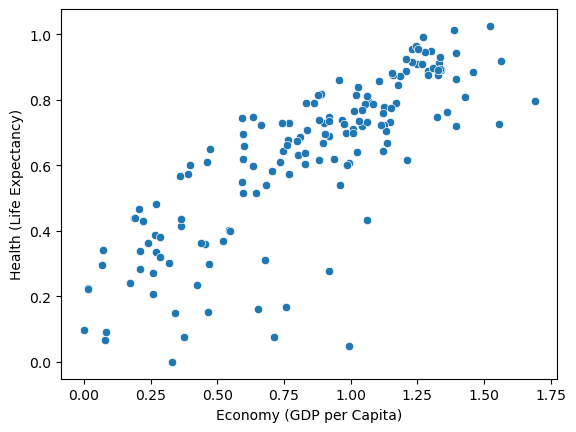

In [16]:
sns.scatterplot(data=data15,x='Economy (GDP per Capita)',y='Health (Life Expectancy)')

Economy and Health are right to be seen as highly correlated.

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Trust (Government Corruption)'>

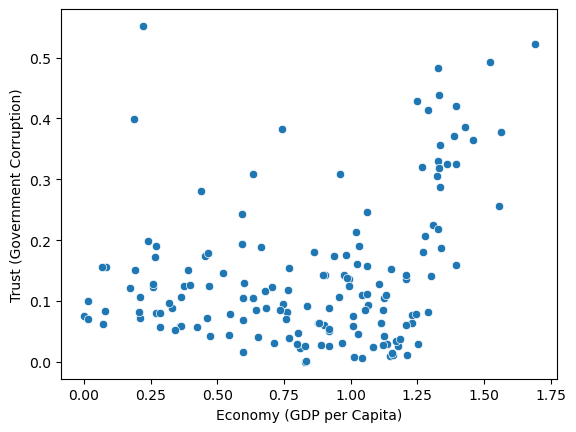

In [17]:
sns.scatterplot(data=data15,x='Economy (GDP per Capita)',y='Trust (Government Corruption)')

By my analysis, Trust might not be so much correlated(its still a assumption).

Now my Analysis is done, lets introduce correlation matrix.

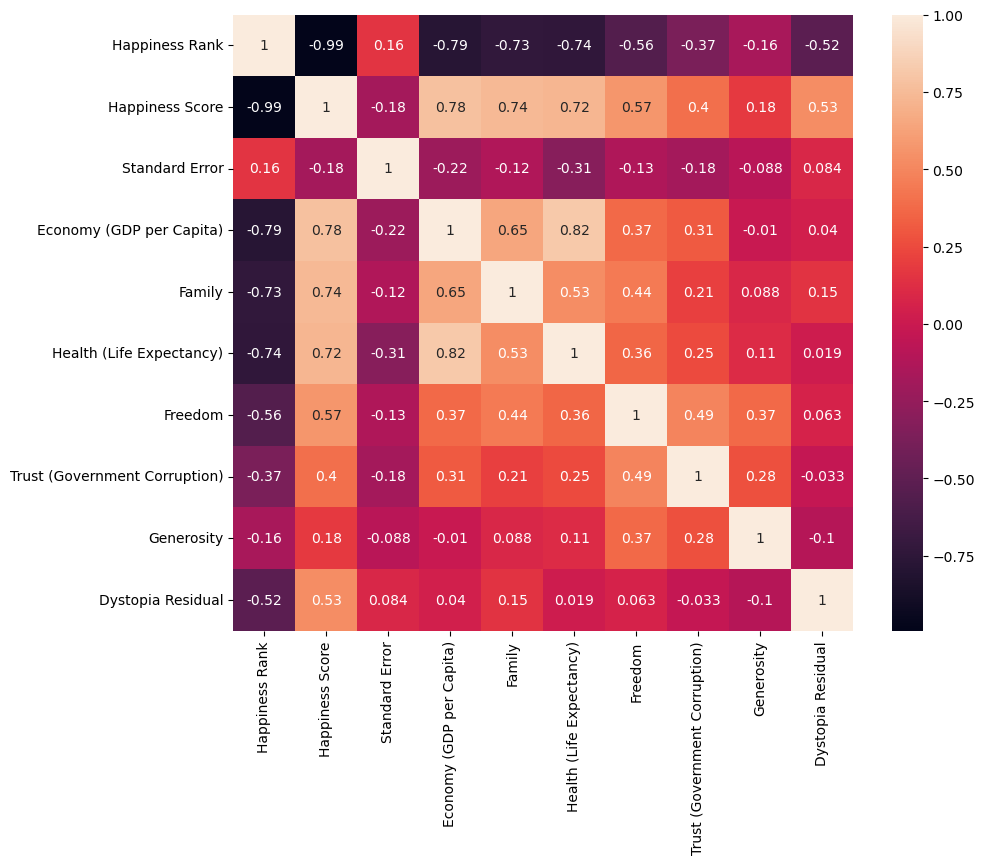

In [18]:
sns.heatmap(data15.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

When you observe the heatmap, happiness rank has worst correlation with other features why do you think?.

Well as lower rank have higher value, and others lower the value, lower the preference. we need to correct this relation. For now i will create a new feature as negative happiness rank and give negative happiness rank to it which will correct the correlation.

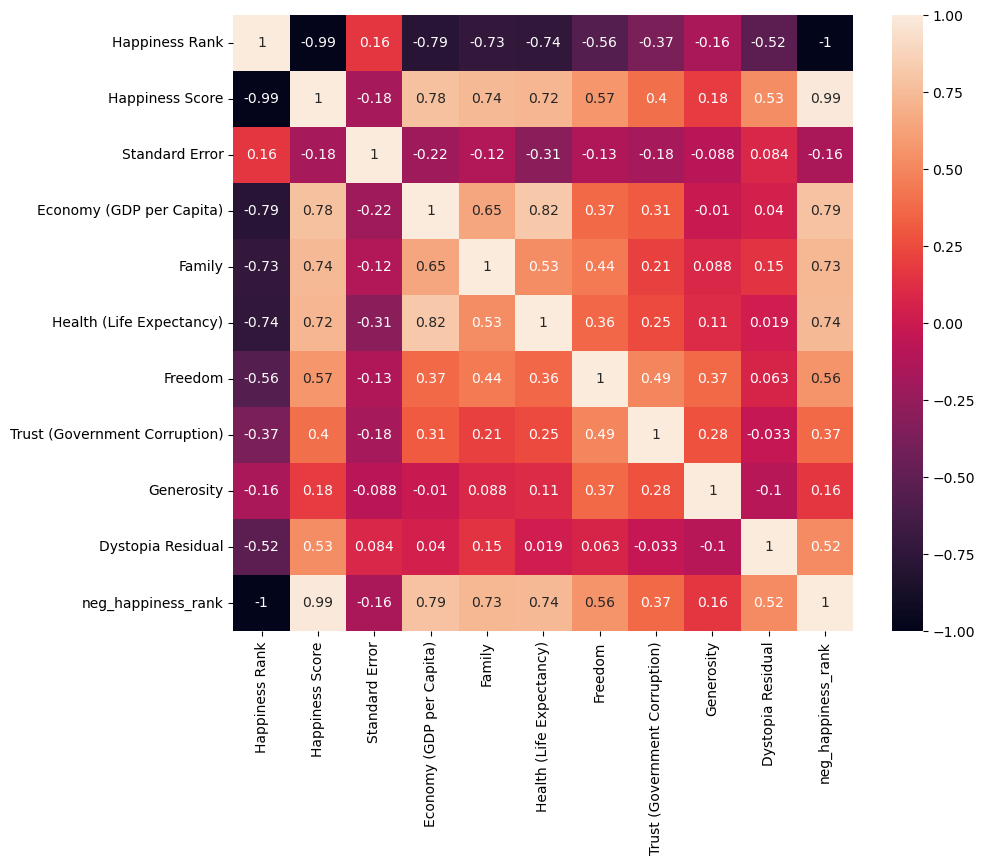

In [19]:
data15['neg_happiness_rank'] = -data15['Happiness Rank']

sns.heatmap(data15.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

We see that my assumption is correct. Economy,Family,Health and Freedom have high correlation and Truest has less correlation like i said. Now lets see other feature correlations. Health and economy have high correlation as i said. 

I mentioned that Economy and Trust might not be too much correlation. So those are correlated but on the lower side. Freedom is only where trust has highly correlated. Others are on the lower side.

This is just **2015 year**

Now i am going through other years but wont be doing in depth analysis.

# 2016

In [20]:
data16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [21]:
data16['Region'].value_counts()

Sub-Saharan Africa                 38
Central and Eastern Europe         29
Latin America and Caribbean        24
Western Europe                     21
Middle East and Northern Africa    19
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
North America                       2
Australia and New Zealand           2
Name: Region, dtype: int64

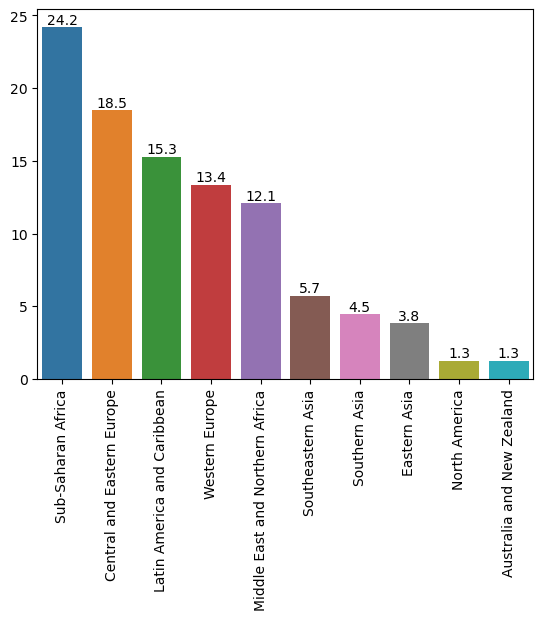

In [22]:
value = data16['Region'].value_counts(normalize=True)*100
sns_plot = sns.barplot(x=value.index,y=value.values)
plt.xticks(rotation=90)

for i,v in enumerate(value.values):
    sns_plot.text(i, v, f"{v:.1f}", ha='center', va='bottom')

plt.show()

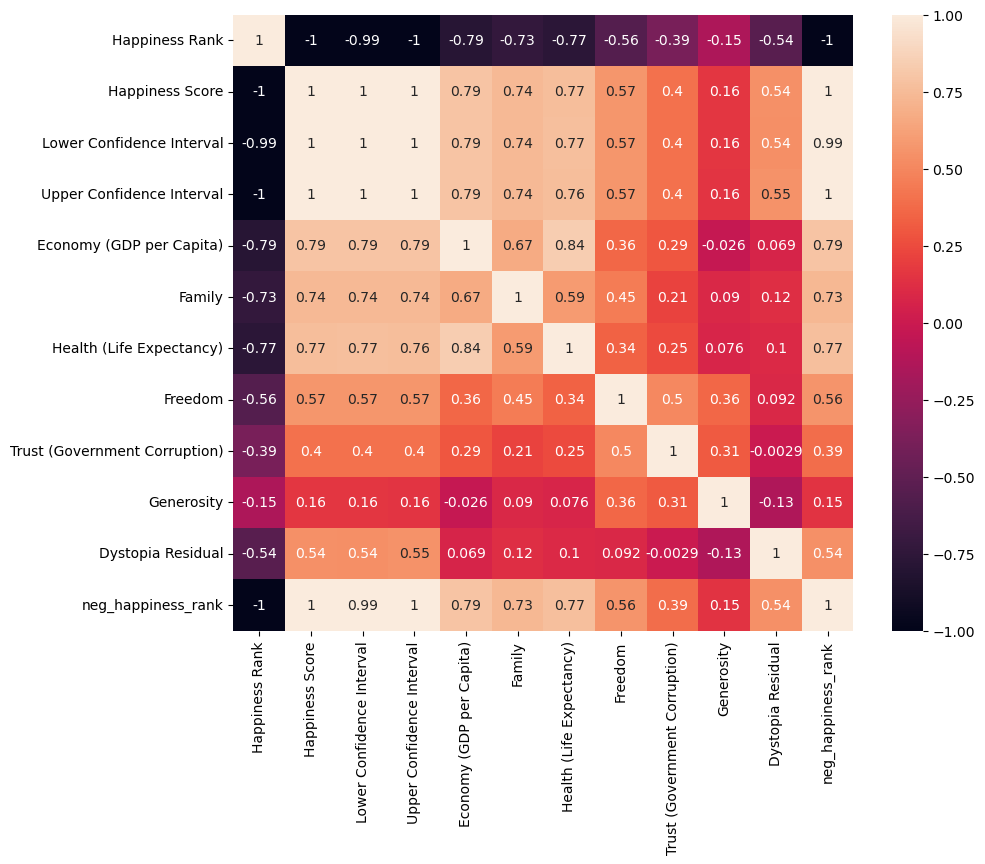

In [23]:
data16['neg_happiness_rank'] = -data16['Happiness Rank']

sns.heatmap(data16.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

Same trends can be seen in 2016 year

# 2017

In [24]:
data17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [25]:
data17.columns

Index(['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high',
       'Whisker.low', 'Economy..GDP.per.Capita.', 'Family',
       'Health..Life.Expectancy.', 'Freedom', 'Generosity',
       'Trust..Government.Corruption.', 'Dystopia.Residual'],
      dtype='object')

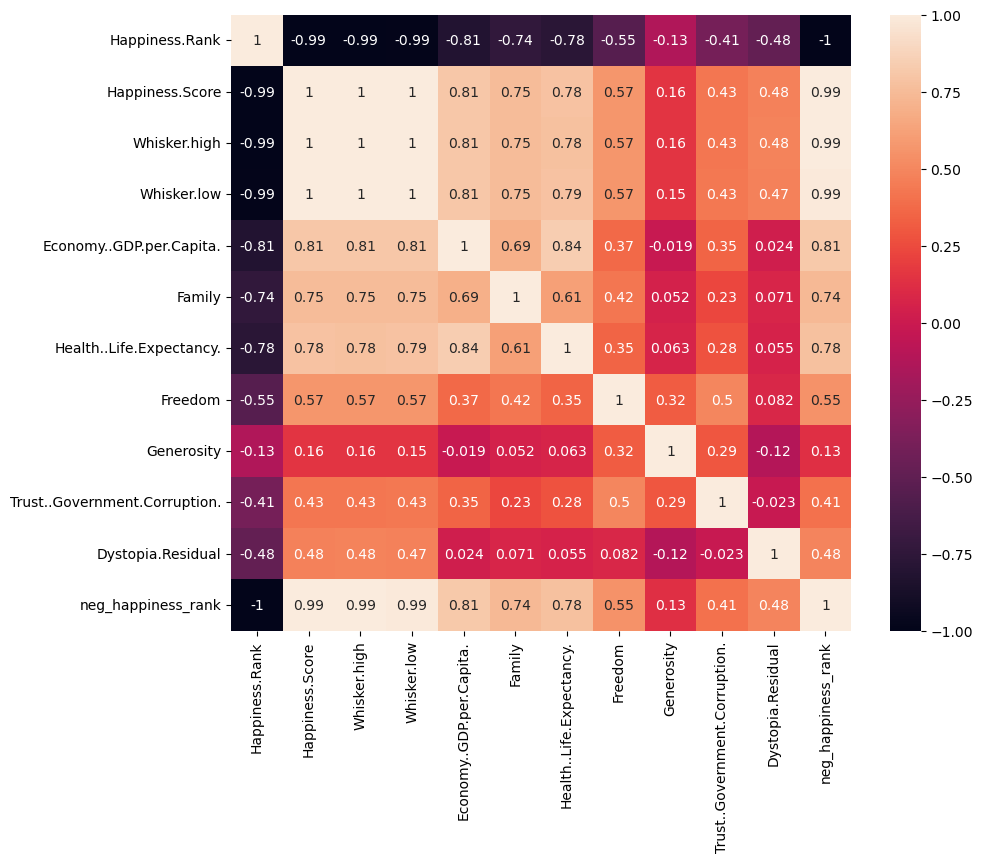

In [26]:
data17['neg_happiness_rank'] = -data17['Happiness.Rank']

sns.heatmap(data17.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

Rank has got highly correlated with Economy,Family and Health. Trust is being on the lower side.

# 2018

In [27]:
data18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


Observing, the features are same but the names have been changed. and new features have been added.

There is a new feature, Social Support. Lets analyze this feature.

<AxesSubplot:xlabel='Overall rank', ylabel='Social support'>

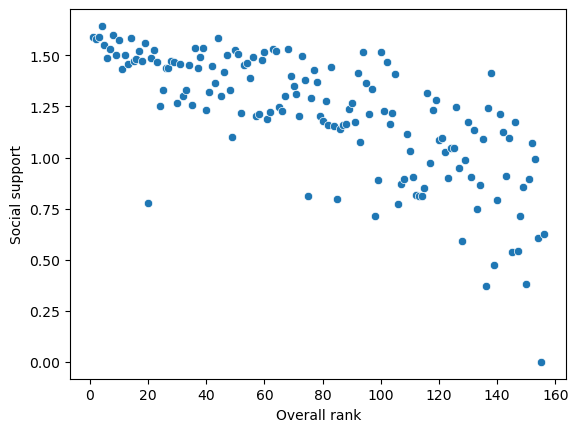

In [28]:
sns.scatterplot(data18,x='Overall rank',y='Social support')

Social support is highly correlated with ranking. 

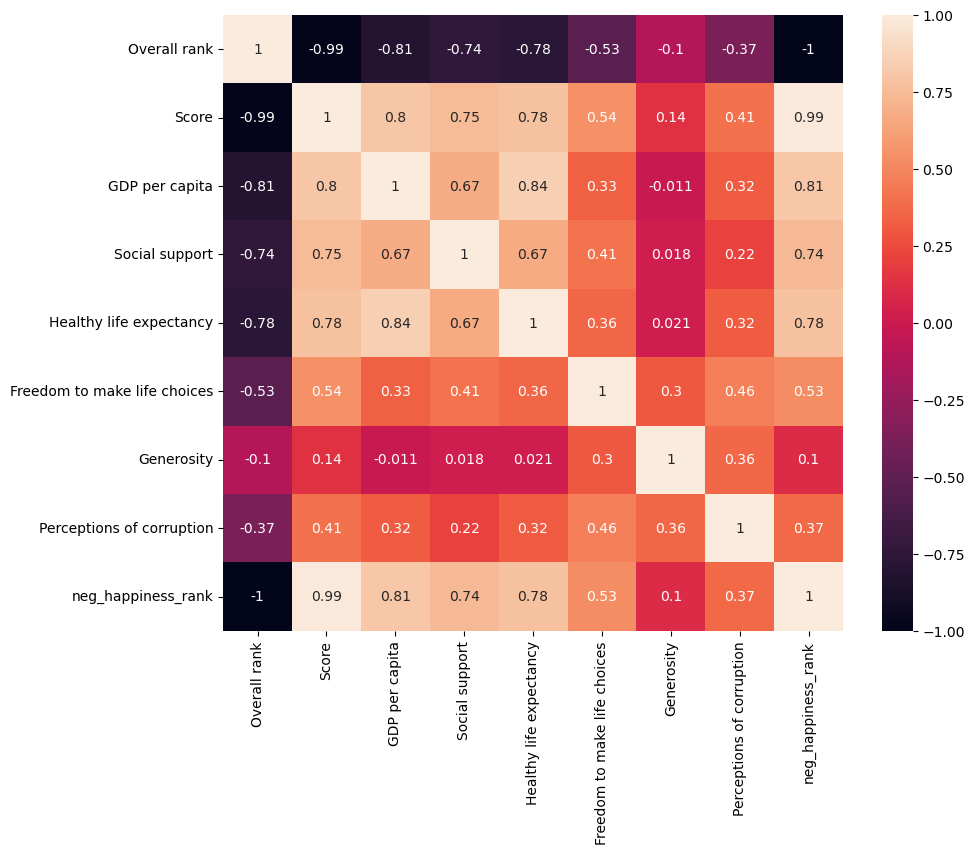

In [29]:
data18['neg_happiness_rank'] = -data18['Overall rank']

sns.heatmap(data18.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

As said, Social support have high correlation and Corruption(Trust) stay at the lower end.

# 2019

In [30]:
data19.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


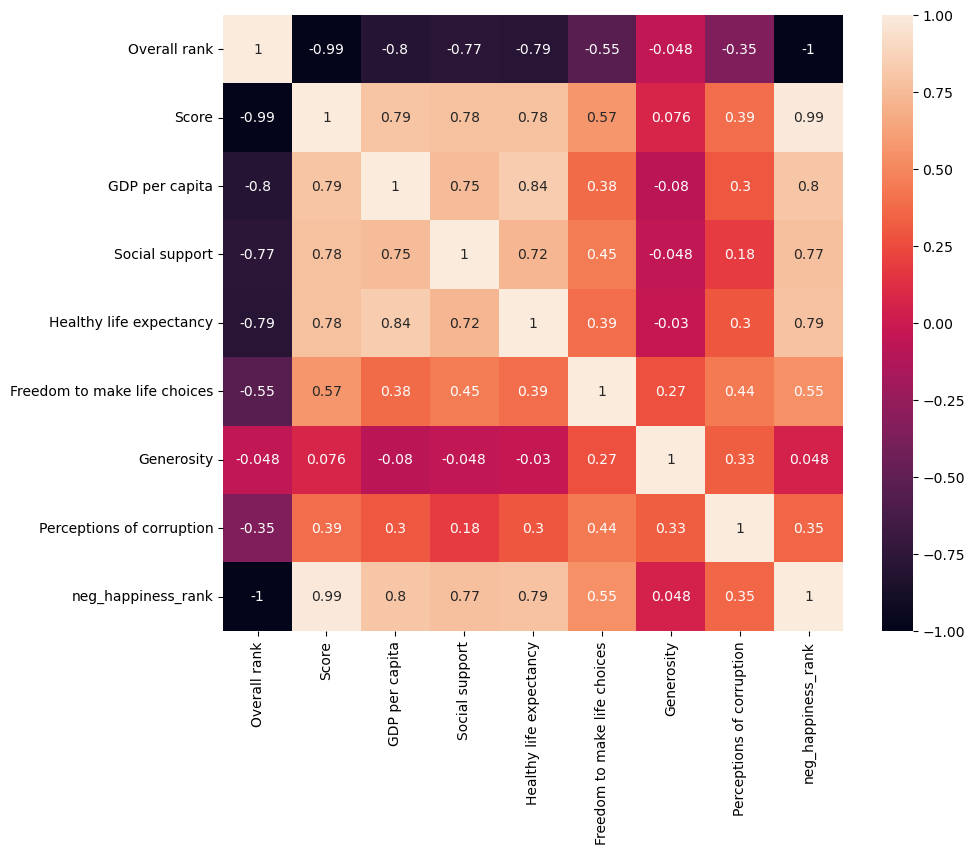

In [31]:
data19['neg_happiness_rank'] = -data19['Overall rank']

sns.heatmap(data19.corr(),annot=True)

fig = plt.gcf()
fig.set_size_inches(10, 8)

plt.show()

This to an end. I worked on this dataset to understand what factors affect happiness ranking. Most of them are significantly Economy, Social Support and Health.